In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [33]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [34]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 음수 부호 출력

- 데이터 빈도(히스토그램, 박스플롯)
- 데이터 전처리
- 변수 검토
- 변수간 관계 분석 및 시각화

In [167]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

In [35]:
xls = pd.ExcelFile('C:/Users/i/data/koweps_visualization.xlsx')

In [36]:
koweps_df = xls.parse(xls.sheet_names[0])

In [37]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


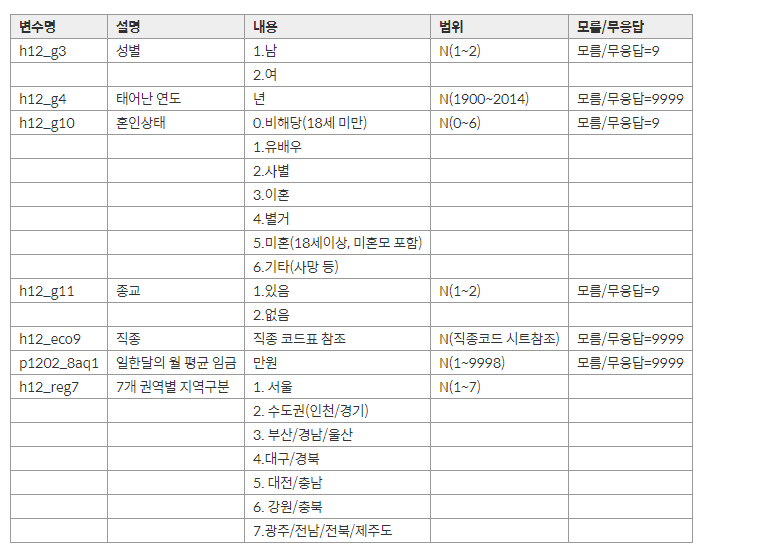

In [38]:
from IPython.display import Image
Image('C:/Users/i/data/koweps_img.png', width = 700)

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [40]:
# 1. 해당 데이터 프레임에서 제공한 컬럼들만 추출하여 사용하고자 하는 컬럼들만 rename 하라.

data = data_df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
data.head()

,h12_g3,h12_g4,h12_g10,h12_g11,h12_eco9,p1202_8aq1,h12_reg7
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [41]:
data.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


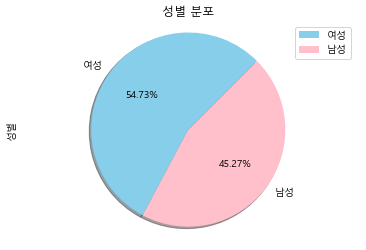

In [48]:
# 데이터 분석
# 성별 데이터 분포 확인
# 성별을 비율 순으로 정렬
# 데이터 시각화

data_gender = data['성별'].value_counts()
data_gender.plot.pie(autopct='%.2f%%',
                     startangle=45,
                     legend=True,
                     shadow=True,
                     labels=['여성', '남성'],
                          colors=['skyblue', 'pink'])
plt.axis('equal')
plt.title('성별 분포')
plt.show()

# 파이 차트는 시리즈 형식만 가능

In [50]:
# 성별 추출
gender_filter_df = data.filter(['성별'])
gender_filter_df.head()

,성별
0,2
1,2
2,1
3,1
4,2


In [54]:
# 성별값을 남, 여로 변경하라
gender_filter_df['성별2'] = np.where(gender_filter_df['성별'] == 1, '남자', '여자') 
#논리적인 조건을 주는 함수 where( 논리식, 맞을 때 리턴값. 그렇지 않을 때 리턴값)
gender_filter_df.head()

,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


In [55]:
# 결측값 확인
gender_filter_df.isna().sum()

성별     0
성별2    0
dtype: int64

In [58]:
# 데이터 분포 확인
gender_count = gender_filter_df['성별2'].value_counts()
gender_count

여자    8440
남자    6982
Name: 성별2, dtype: int64

In [60]:
# 시리즈를 데이터 프레임으로 변환
gender_count_df = pd.DataFrame(gender_count)
gender_count_df.head()

,성별2
여자,8440
남자,6982


In [61]:
gender_count_df.rename(columns = {'성별2' : '명'} , inplace=True)
gender_count_df

,명
여자,8440
남자,6982


In [65]:
# 비율순으로 정렬
gender_count_df.sort_values('명', inplace=True)
gender_count_df

,명
남자,6982
여자,8440


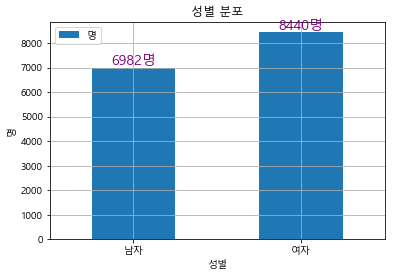

In [84]:
# 성별 분포를 시각화
gender_count_df.plot.bar(rot=0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate(list(gender_count_df['명'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, 
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=14,
             color='purple')

plt.show()

### [실습] 성별에 따른 평균 급여 차이를 분석
- 성별과 월급 데이터만 추출
- 성별을 남자와 여자로 변환
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(성별로 그룹화해 그룹별 평균)
- 데이터 시각화

In [104]:
data.head()

# 성별과 월급 데이터만 추출
gender_wage = data[['성별', '일한달의 월 평균 임금']]
gender_wage.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [193]:
# 성별을 남자와 여자로 변환
gender_wage['성별'] = np.where(gender_wage['성별'] == 1, '남자', '여자')
gender_wage.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,여자,NaN
3,여자,108.9
4,여자,NaN


In [114]:
# 데이터 정제(결측값 확인, 결측값 제거)
gender_wage.isna().sum()
gender_wage_dropna = gender_wage['일한달의 월 평균 임금'].dropna()
gender_wage_dropna.isna().sum()

0

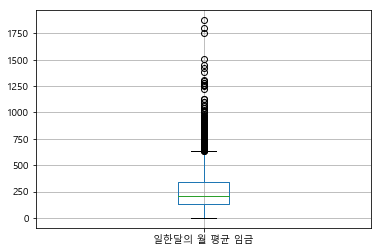

In [118]:
# 이상치 결측 처리를 위한 데이터프레임 생성
outlier_df = pd.DataFrame(gender_wage_dropna)
outlier_df.boxplot()

In [119]:
# 3사분위 정보
quantile75 = outlier_df.quantile(q=0.75)
quantile75

일한달의 월 평균 임금    336.0
Name: 0.75, dtype: float64

In [120]:
# 1사분위 정보
quantile25 = outlier_df.quantile(q=0.25)
quantile25

일한달의 월 평균 임금    135.0
Name: 0.25, dtype: float64

In [121]:
# IQR (3사분위 수 - 1사분위 수)
iqr = quantile75 - quantile25
iqr

일한달의 월 평균 임금    201.0
dtype: float64

In [122]:
# 최저 한계치(lower fence)
lower_fence = quantile25 - 1.5 * iqr
print('lower_fence\n' , lower_fence) # \n은 개행, 아랫줄로 내린다.

# 최고 한계치(upper fence)
upper_fence = quantile75 + 1.5 * iqr
print('upper_fence\n' , upper_fence)

lower_fence
 일한달의 월 평균 임금   -166.5
dtype: float64
upper_fence
 일한달의 월 평균 임금    637.5
dtype: float64


In [123]:
# outlier_df 
# 극단치 경계 값을 얻어보자 (아래 수평선)
lower_outlier = outlier_df[outlier_df > lower_fence].min()
lower_outlier

일한달의 월 평균 임금    0.0
dtype: float64

In [124]:
# 극단치 경계 값을 얻어보자 (위 수평선)
upper_outlier = outlier_df[ outlier_df < upper_fence ].max()
upper_outlier

일한달의 월 평균 임금    634.0
dtype: float64

In [195]:
# 이상치 추출
outlier = outlier_df[outlier_df['일한달의 월 평균 임금'] > upper_outlier['일한달의 월 평균 임금']]
outlier.head()

,일한달의 월 평균 임금
76,841.0
80,691.0
133,1800.0
175,693.0
244,758.0


In [144]:
outlier2 = outlier_df[outlier_df['일한달의 월 평균 임금'] < lower_outlier['일한달의 월 평균 임금']]
outlier2

,일한달의 월 평균 임금


In [147]:
# copy()
clean_df = gender_wage.copy()
clean_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [149]:
# 이상치를 결측값으로 변경
for idx in outlier.index :
    #print(idx)
    clean_df.loc[idx, '일한달의 월 평균 임금'] = np.nan
clean_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [196]:
# 다시 결측치 제거
gender_wage_df = clean_df.dropna()
gender_wage_df.isna().sum()

성별              0
일한달의 월 평균 임금    0
dtype: int64

In [197]:
# 성별에 따른 월 평균 임금
gender_group = gender_wage_df.groupby('성별').mean()
gender_group

,일한달의 월 평균 임금
성별,
남자,289.125203
여자,170.066146


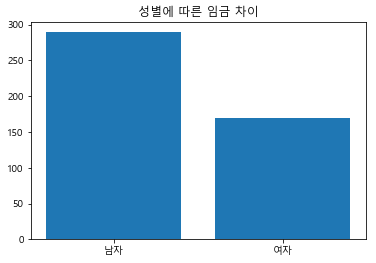

In [198]:
# 성별에 따른 임금 차이 시각화
X = gender_group.index
Y = gender_group['일한달의 월 평균 임금']
plt.title('성별에 따른 임금 차이')
plt.bar(X, Y)
plt.show()

### [실습2] 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 연도, 월급에 대한 컬럼 추출, 나이를 계산해 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이에 따른 급여 평균)
- 데이터 시각화

In [171]:
# 나이를 계산해 파생변수 추가
data['나이(만)'] = 2020 - data['태어난 연도']
data.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,나이(만)
0,2,1936,2,2,NaN,NaN,1,84
1,2,1945,2,2,NaN,NaN,1,75
2,1,1948,2,2,NaN,NaN,1,72
3,1,1942,3,1,762.0,108.9,1,78
4,2,1923,2,1,NaN,NaN,1,97


In [180]:
# 태어난 연도, 월급, 나이 컬럼 추출
data_parse = data[['태어난 연도', '일한달의 월 평균 임금', '나이(만)']]

In [181]:
# 결측값 확인
data_parse.isna().sum()

태어난 연도              0
일한달의 월 평균 임금    10915
나이(만)               0
dtype: int64

In [183]:
# 임금 이상치 결측값 처리
for idx in outlier.index :
    #print(idx)
    data_parse.loc[idx, '일한달의 월 평균 임금'] = np.nan
data_parse.head()

,태어난 연도,일한달의 월 평균 임금,나이(만)
0,1936,NaN,84
1,1945,NaN,75
2,1948,NaN,72
3,1942,108.9,78
4,1923,NaN,97


In [185]:
# 결측값 제거
age_wage = data_parse.dropna()

In [190]:
# 나이에 따른 급여 평균
age_group_mean = age_wage[['나이(만)', '일한달의 월 평균 임금']].groupby('나이(만)').mean()
age_group_mean.head()

,일한달의 월 평균 임금
나이(만),
22,89.333333
23,136.720000
24,140.807692
25,138.000000
26,145.652000


Text(0.5,1,'나이에 따른 임금 평균')

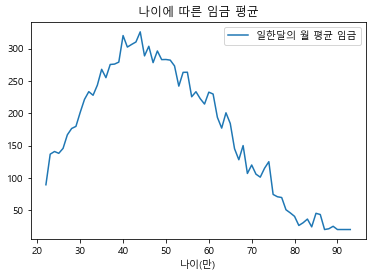

In [201]:
# 데이터 시각화
age_group_mean.plot()
plt.title('나이에 따른 임금 평균')

### [실습 + a]
- 연령대에 따른 분포
- 연령대별 평균 급여 변화
- 성별과 연령대 분포
- 성별과 연령대에 따른 평균 급여 변화
- 지역별 연령층 분포와 연령층별 지역 비율